# Air Quality Index Detection

Air is what keeps humans alive. Monitoring it and understanding its quality is of immense importance to our well-being.

Content
The dataset contains air quality data and AQI (Air Quality Index) at hourly and daily level of various stations across multiple cities in India.

AQI
A tutorial of how AQI is calculated is available here: https://www.kaggle.com/rohanrao/calculating-aqi-air-quality-index

Cities
Ahmedabad, Aizawl, Amaravati, Amritsar, Bengaluru, Bhopal, Brajrajnagar, Chandigarh, Chennai, Coimbatore, Delhi, Ernakulam, Gurugram, Guwahati, Hyderabad, Jaipur, Jorapokhar, Kochi, Kolkata, Lucknow, Mumbai, Patna, Shillong, Talcher, Thiruvananthapuram, Visakhapatnam

Acknowledgements
The data has been made publicly available by the Central Pollution Control Board: https://cpcb.nic.in/ which is the official portal of Government of India. They also have a real-time monitoring app: https://app.cpcbccr.com/AQI_India/

Noise
Similar to air monitoring data, a dataset on noise decibel levels in India is available here: https://www.kaggle.com/rohanrao/noise-monitoring-data-in-india

### importing libraries

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [138]:
#import data
data = pd.read_csv('city_day.csv')

In [139]:
type(data)

pandas.core.frame.DataFrame

In [140]:
#full data 
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [141]:
#to fetch first 5 datas
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [142]:
#to fetch last 5 datas
data.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [143]:
data.sample(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
11856,Delhi,2019-06-16,42.06,160.96,11.58,20.56,21.83,24.86,0.80,9.54,46.81,1.08,12.14,0.17,205.0,Poor
27808,Thiruvananthapuram,2019-10-15,16.53,29.12,0.85,4.47,7.60,3.38,1.09,0.92,15.67,NaN,NaN,NaN,67.0,Satisfactory
7743,Chandigarh,2020-04-02,11.20,31.54,1.47,9.80,6.30,34.46,0.39,8.68,19.40,2.94,0.11,0.99,34.0,Good
8652,Chennai,2017-03-29,35.04,NaN,4.82,9.35,7.99,NaN,0.00,3.47,15.58,0.06,0.00,NaN,61.0,Satisfactory
1698,Ahmedabad,2019-08-26,45.77,164.31,36.07,56.76,68.79,NaN,36.07,55.67,29.03,2.14,32.05,0.52,532.0,Severe
5958,Bengaluru,2019-07-23,19.14,41.62,6.94,23.99,25.31,11.49,0.75,3.98,24.30,0.40,1.38,NaN,56.0,Satisfactory
4111,Amritsar,2020-01-01,94.38,137.93,9.91,10.38,18.95,5.10,0.42,15.79,40.21,2.62,2.40,1.98,184.0,Moderate
1100,Ahmedabad,2018-01-05,73.61,NaN,25.96,173.08,103.80,NaN,25.96,93.86,36.51,17.69,61.48,9.93,534.0,Severe
20378,Lucknow,2016-06-16,59.30,NaN,6.97,32.50,3.17,NaN,1.12,6.50,28.43,0.96,0.90,NaN,105.0,Moderate
3626,Amritsar,2018-09-03,NaN,36.88,18.56,12.70,13.82,8.53,0.00,3.28,20.52,4.05,4.03,5.56,NaN,NaN


# Data Analyis and Preprocessing

In [144]:
#chechking the data description
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [145]:
#to get information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


Missing data found
# Missing data handling

In [146]:
data = data.fillna(data.median())
#as we dint find outlairers

In [147]:
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,NaN
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,NaN
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,NaN
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,NaN
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [148]:
# handling categorical missing data
data = data.dropna()
data = data.drop(['City','Date'],axis=1)

In [149]:
# missing data handling done
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24850 entries, 28 to 29530
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       24850 non-null  float64
 1   PM10        24850 non-null  float64
 2   NO          24850 non-null  float64
 3   NO2         24850 non-null  float64
 4   NOx         24850 non-null  float64
 5   NH3         24850 non-null  float64
 6   CO          24850 non-null  float64
 7   SO2         24850 non-null  float64
 8   O3          24850 non-null  float64
 9   Benzene     24850 non-null  float64
 10  Toluene     24850 non-null  float64
 11  Xylene      24850 non-null  float64
 12  AQI         24850 non-null  float64
 13  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(1)
memory usage: 2.8+ MB


# Exploratory Data Analysis

In [150]:
data["PM2.5"].describe()

count    24850.000000
mean        66.960771
std         62.285153
min          0.040000
25%         29.560000
50%         48.570000
75%         79.507500
max        914.940000
Name: PM2.5, dtype: float64

In [151]:
data.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,1.000000,0.525022,0.459731,0.367966,0.415427,0.162189,0.093934,0.126169,0.166803,0.025106,0.126800,0.081276,0.655945
PM10,0.525022,1.000000,0.458007,0.364660,0.458378,0.201836,0.019657,0.167411,0.211705,0.022687,0.122714,0.022599,0.456212
NO,0.459731,0.458007,1.000000,0.478461,0.794400,0.147195,0.218681,0.186561,0.018228,0.044697,0.147918,0.076420,0.452233
NO2,0.367966,0.364660,0.478461,1.000000,0.622794,0.144730,0.371877,0.417248,0.289184,0.039472,0.292271,0.179681,0.535813
NOx,0.415427,0.458378,0.794400,0.622794,1.000000,0.132035,0.250417,0.237311,0.095779,0.054808,0.196114,0.087662,0.470915
NH3,0.162189,0.201836,0.147195,0.144730,0.132035,1.000000,-0.022100,-0.054975,0.070497,-0.001359,0.008462,-0.042220,0.086479
CO,0.093934,0.019657,0.218681,0.371877,0.250417,-0.022100,1.000000,0.493899,0.038340,0.050778,0.280388,0.177273,0.678071
SO2,0.126169,0.167411,0.186561,0.417248,0.237311,-0.054975,0.493899,1.000000,0.165752,0.037432,0.283894,0.260916,0.485029
O3,0.166803,0.211705,0.018228,0.289184,0.095779,0.070497,0.038340,0.165752,1.000000,0.018851,0.129202,0.077543,0.194327
Benzene,0.025106,0.022687,0.044697,0.039472,0.054808,-0.001359,0.050778,0.037432,0.018851,1.000000,0.713076,0.089383,0.048855


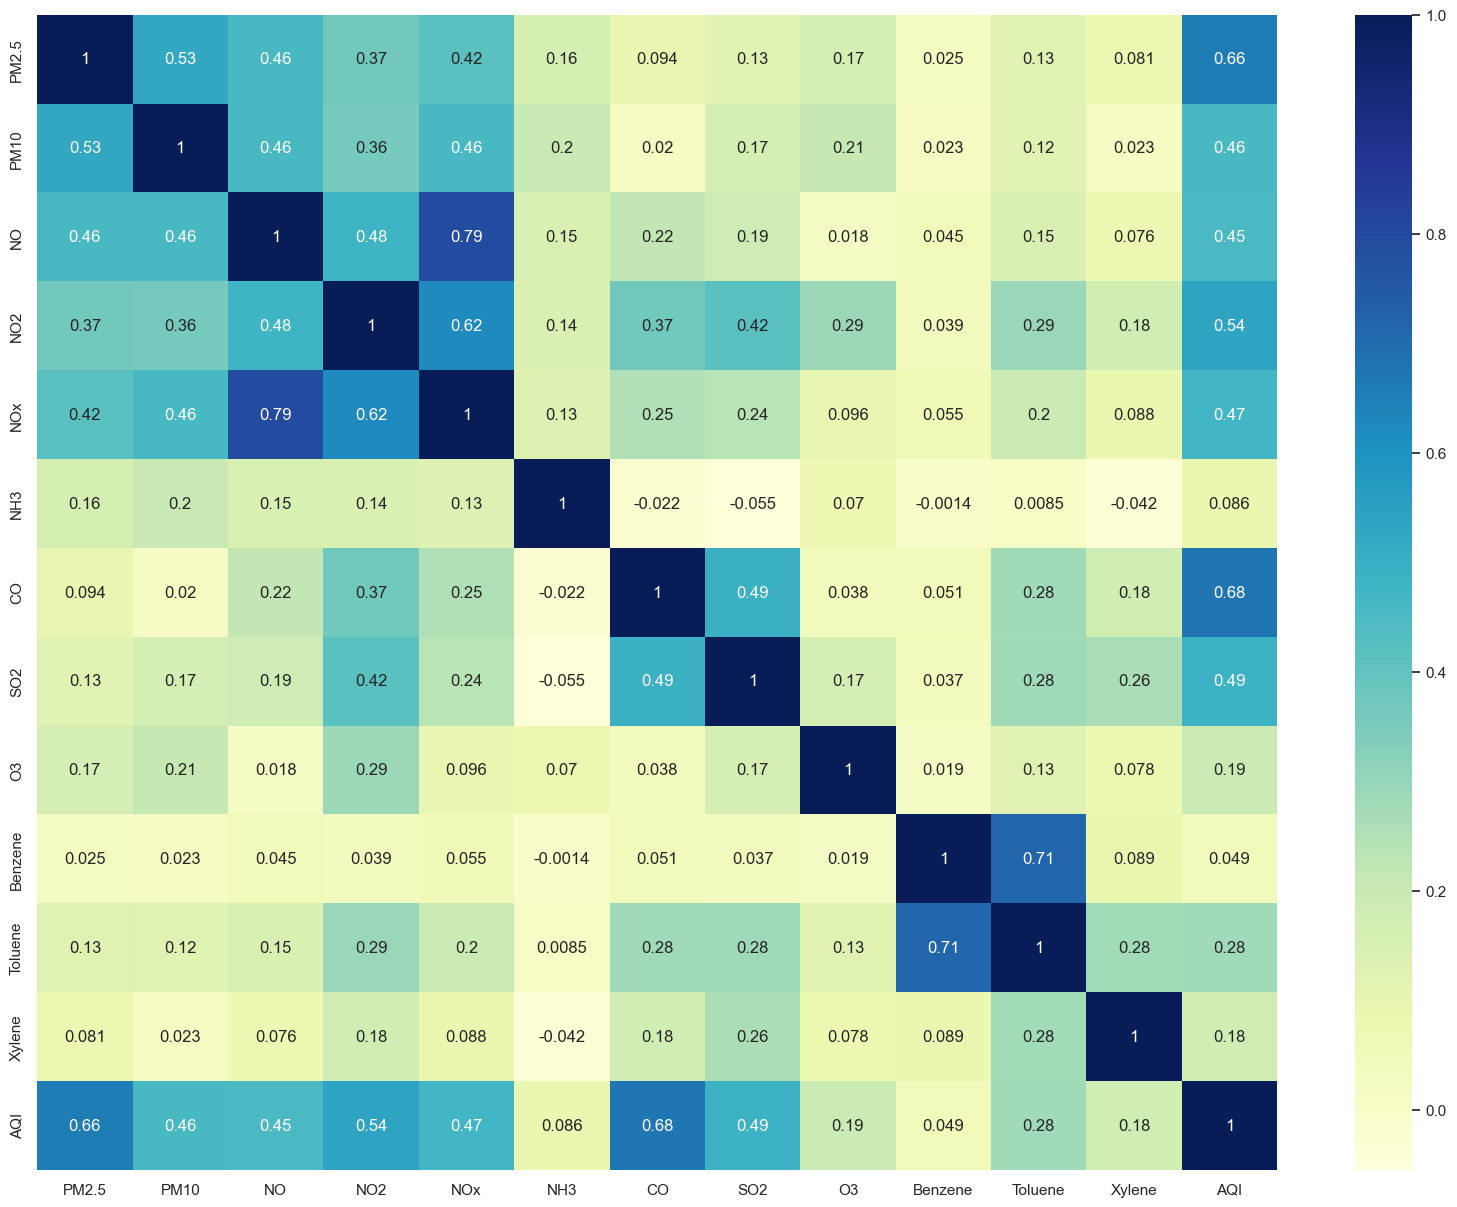

In [152]:
sns.set(rc={'figure.figsize':(20,15)})
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) 

<AxesSubplot:xlabel='AQI_Bucket', ylabel='PM2.5'>

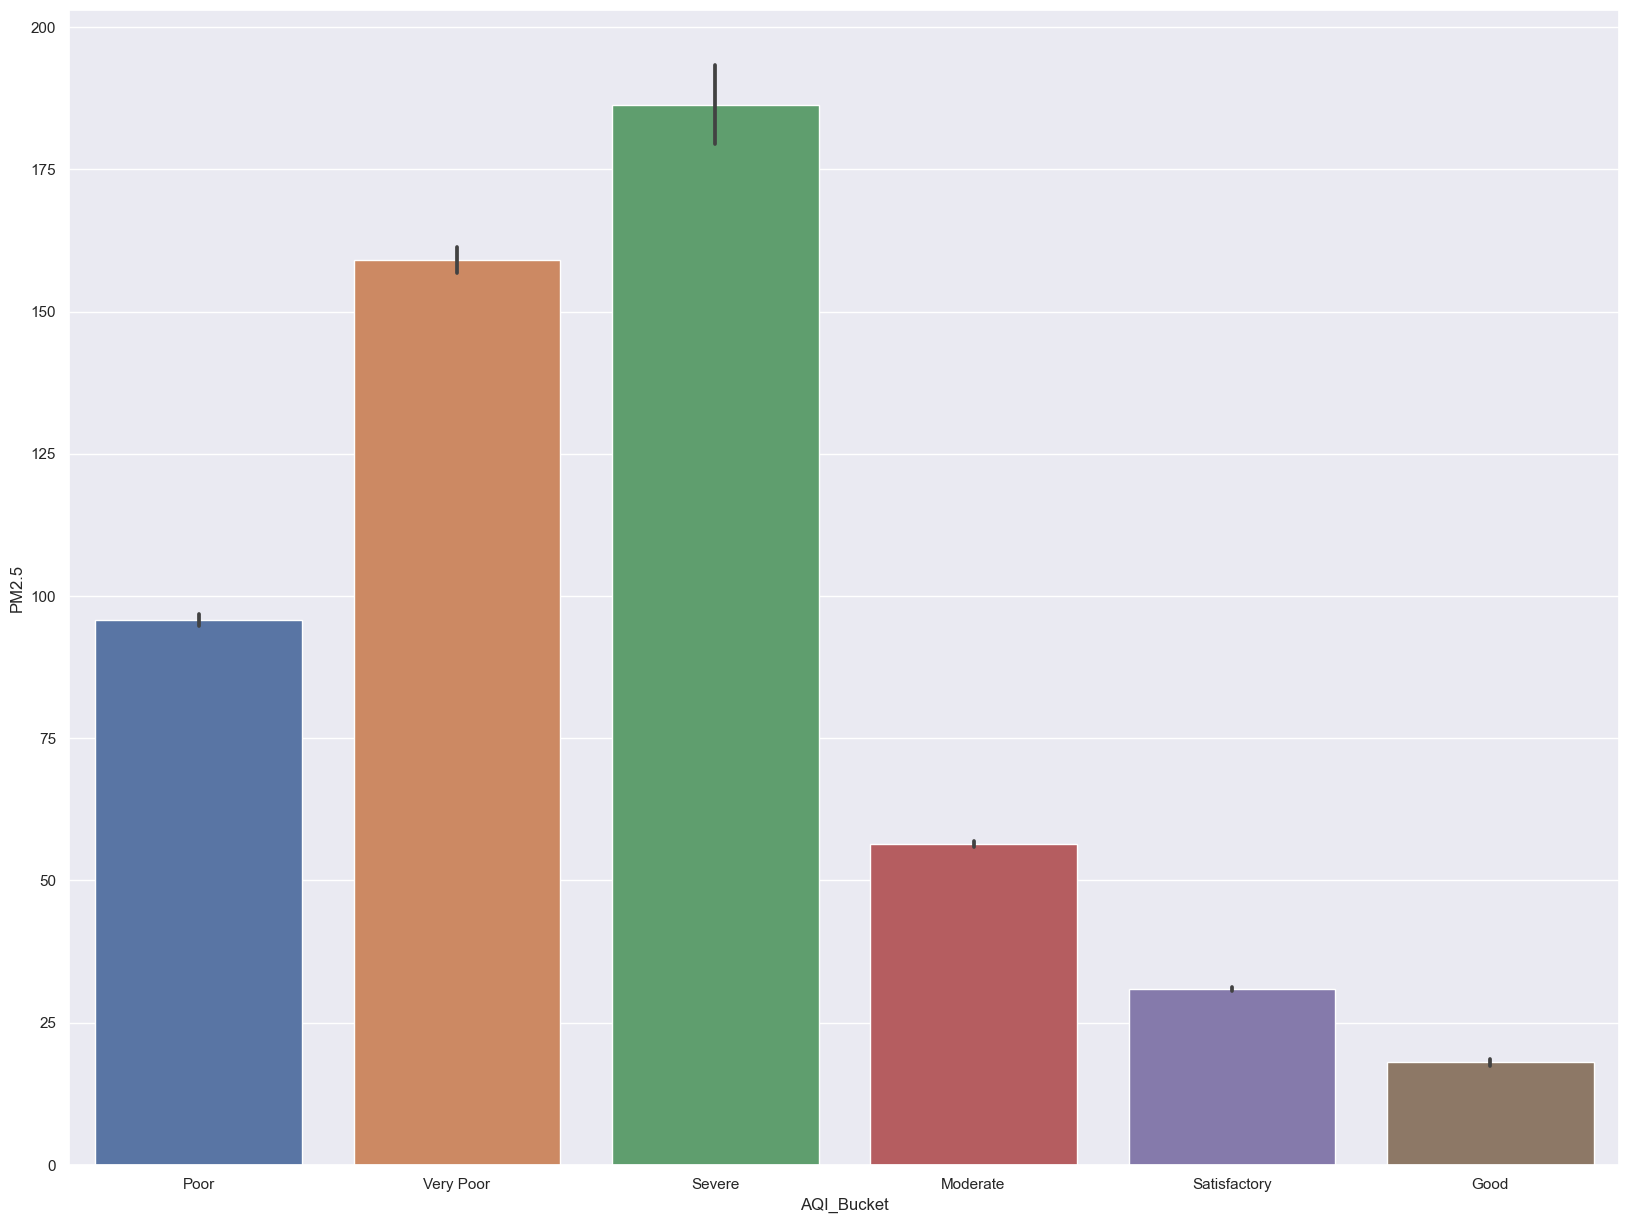

In [153]:
sns.barplot(x=data.AQI_Bucket,y=data["PM2.5"])

<AxesSubplot:xlabel='AQI_Bucket', ylabel='PM10'>

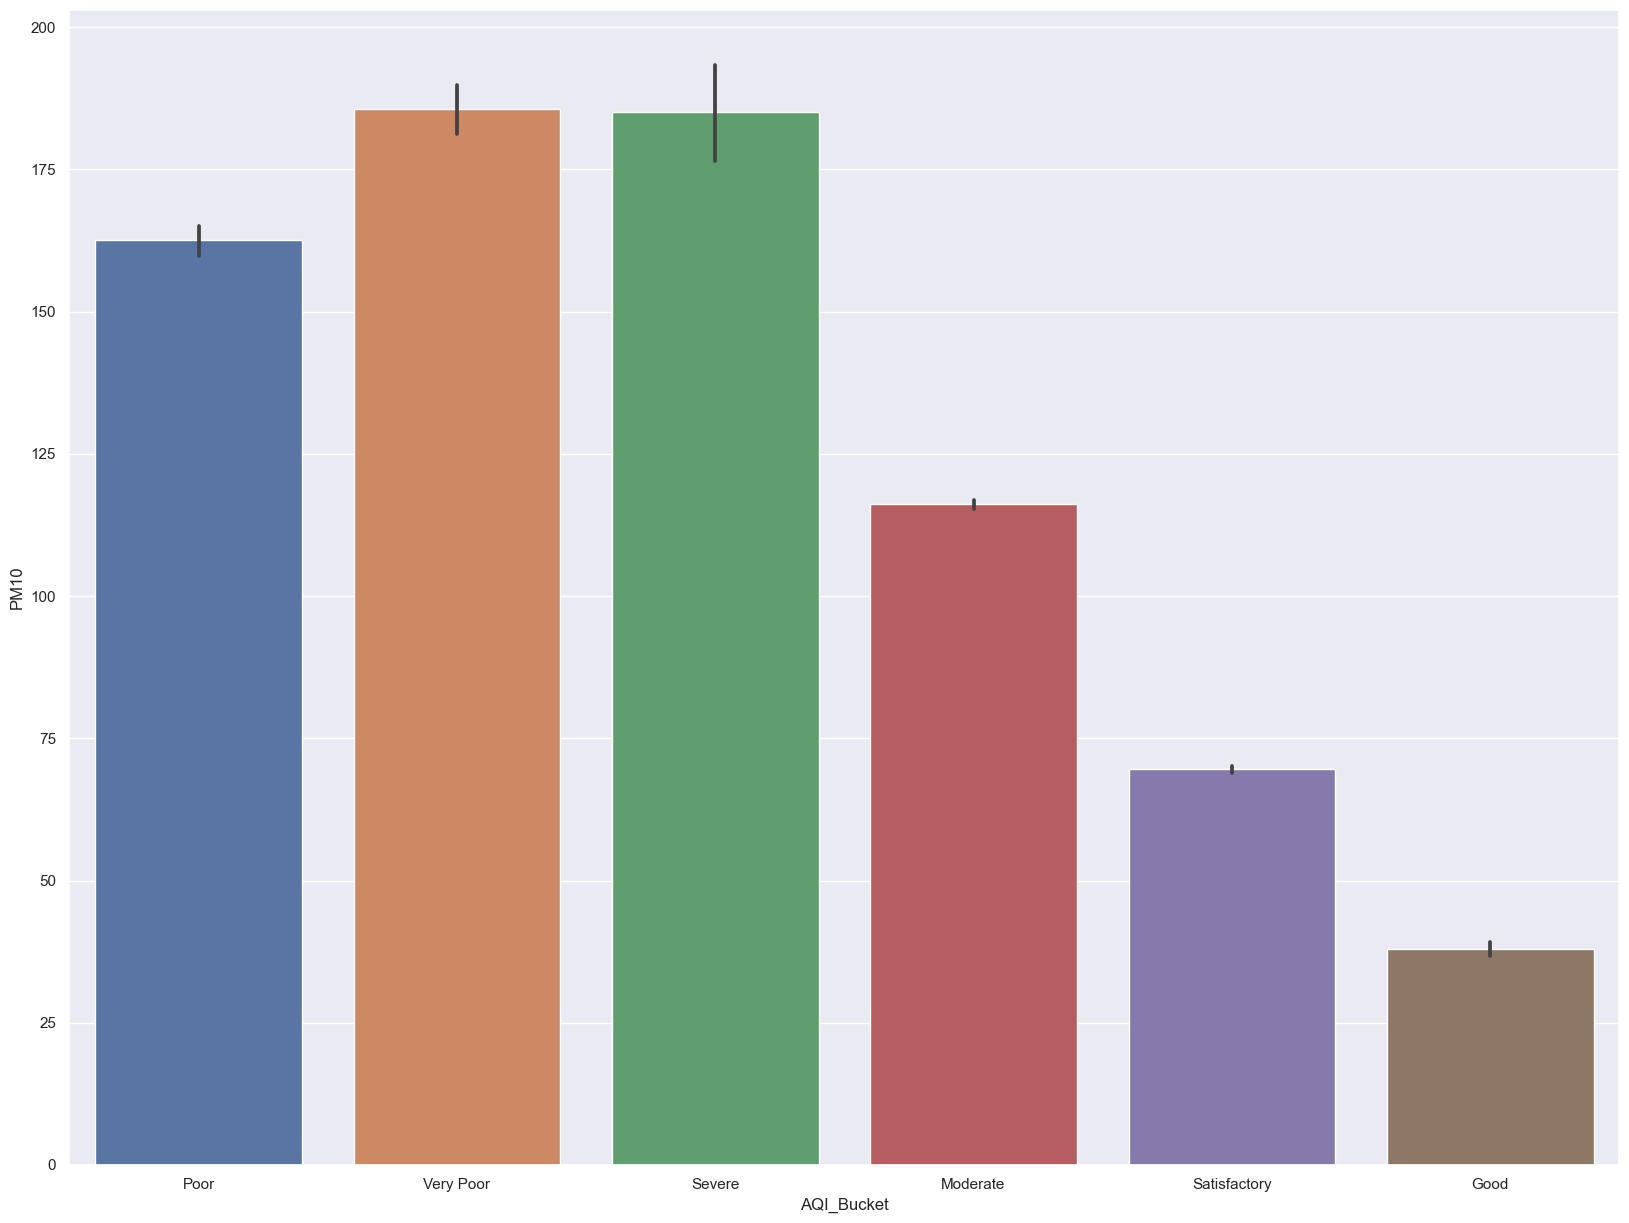

In [154]:
sns.barplot(x=data.AQI_Bucket,y=data["PM10"])

<AxesSubplot:xlabel='AQI_Bucket', ylabel='CO'>

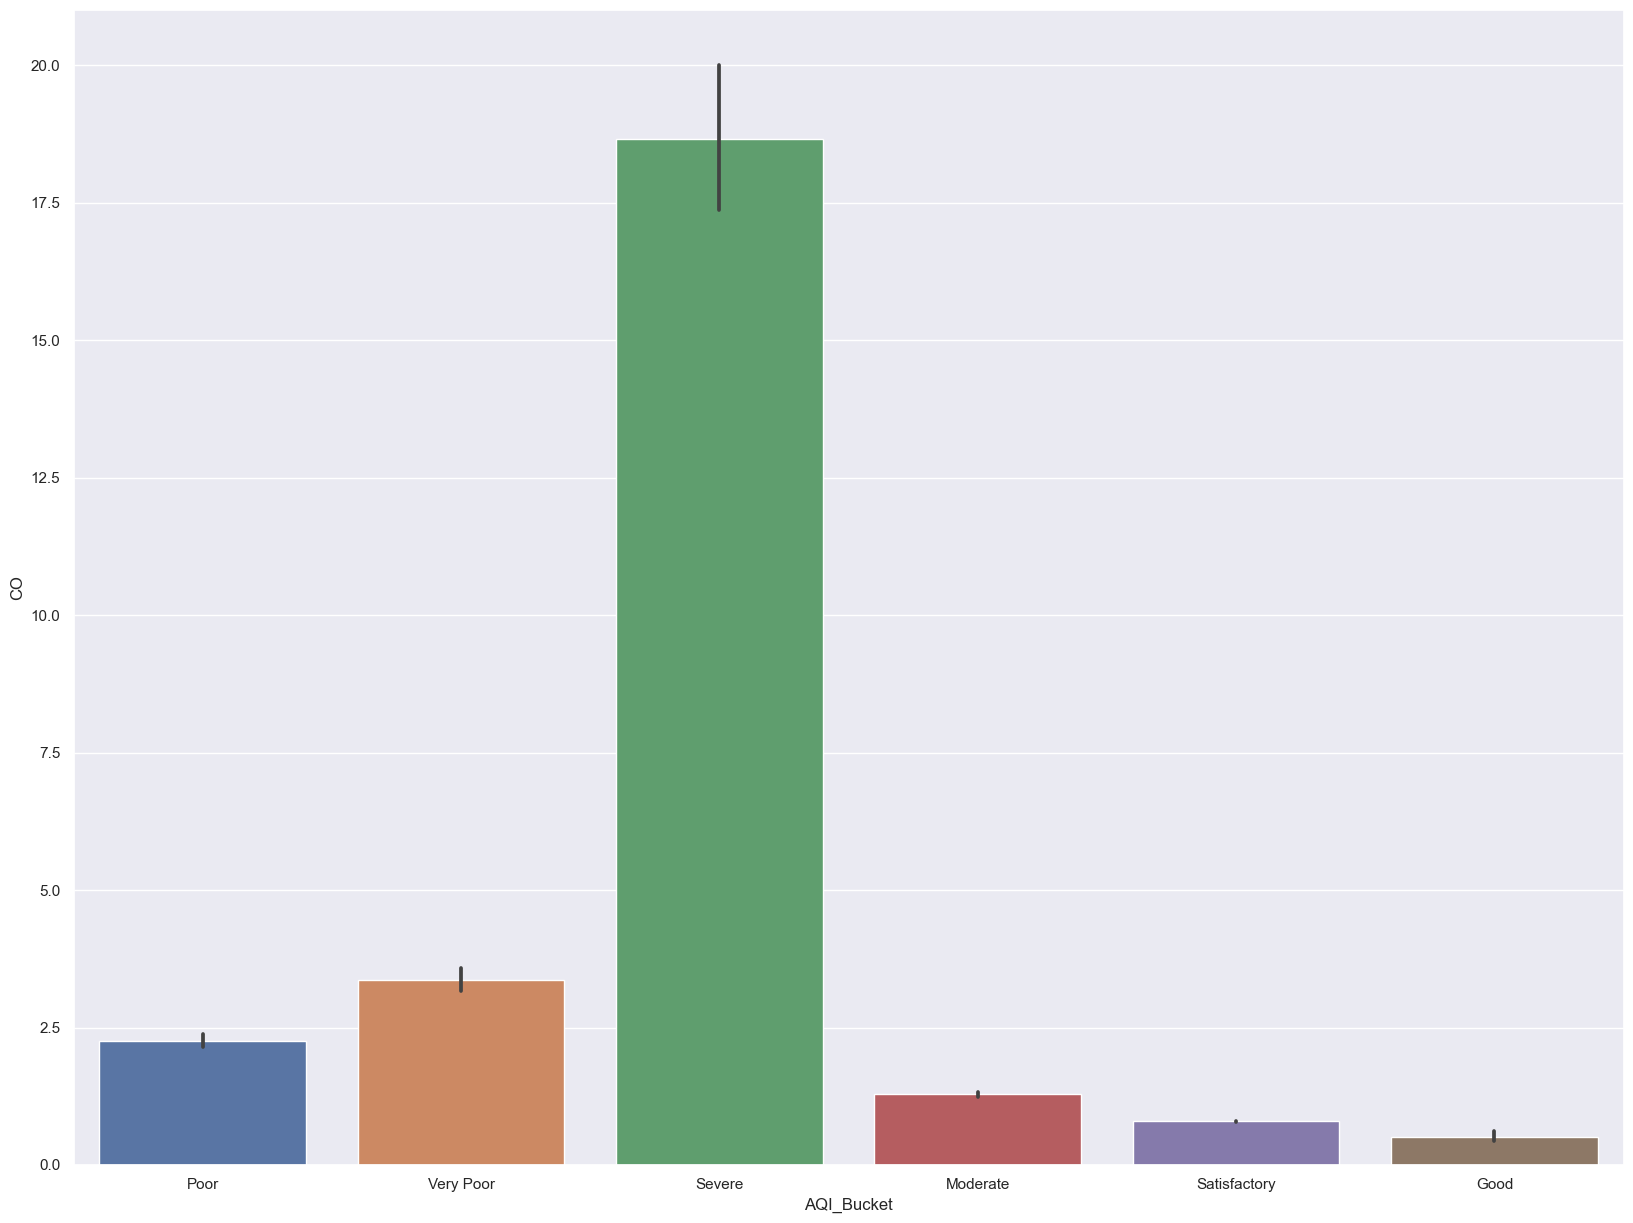

In [155]:
sns.barplot(x=data.AQI_Bucket,y=data["CO"])

<AxesSubplot:xlabel='AQI_Bucket', ylabel='NO'>

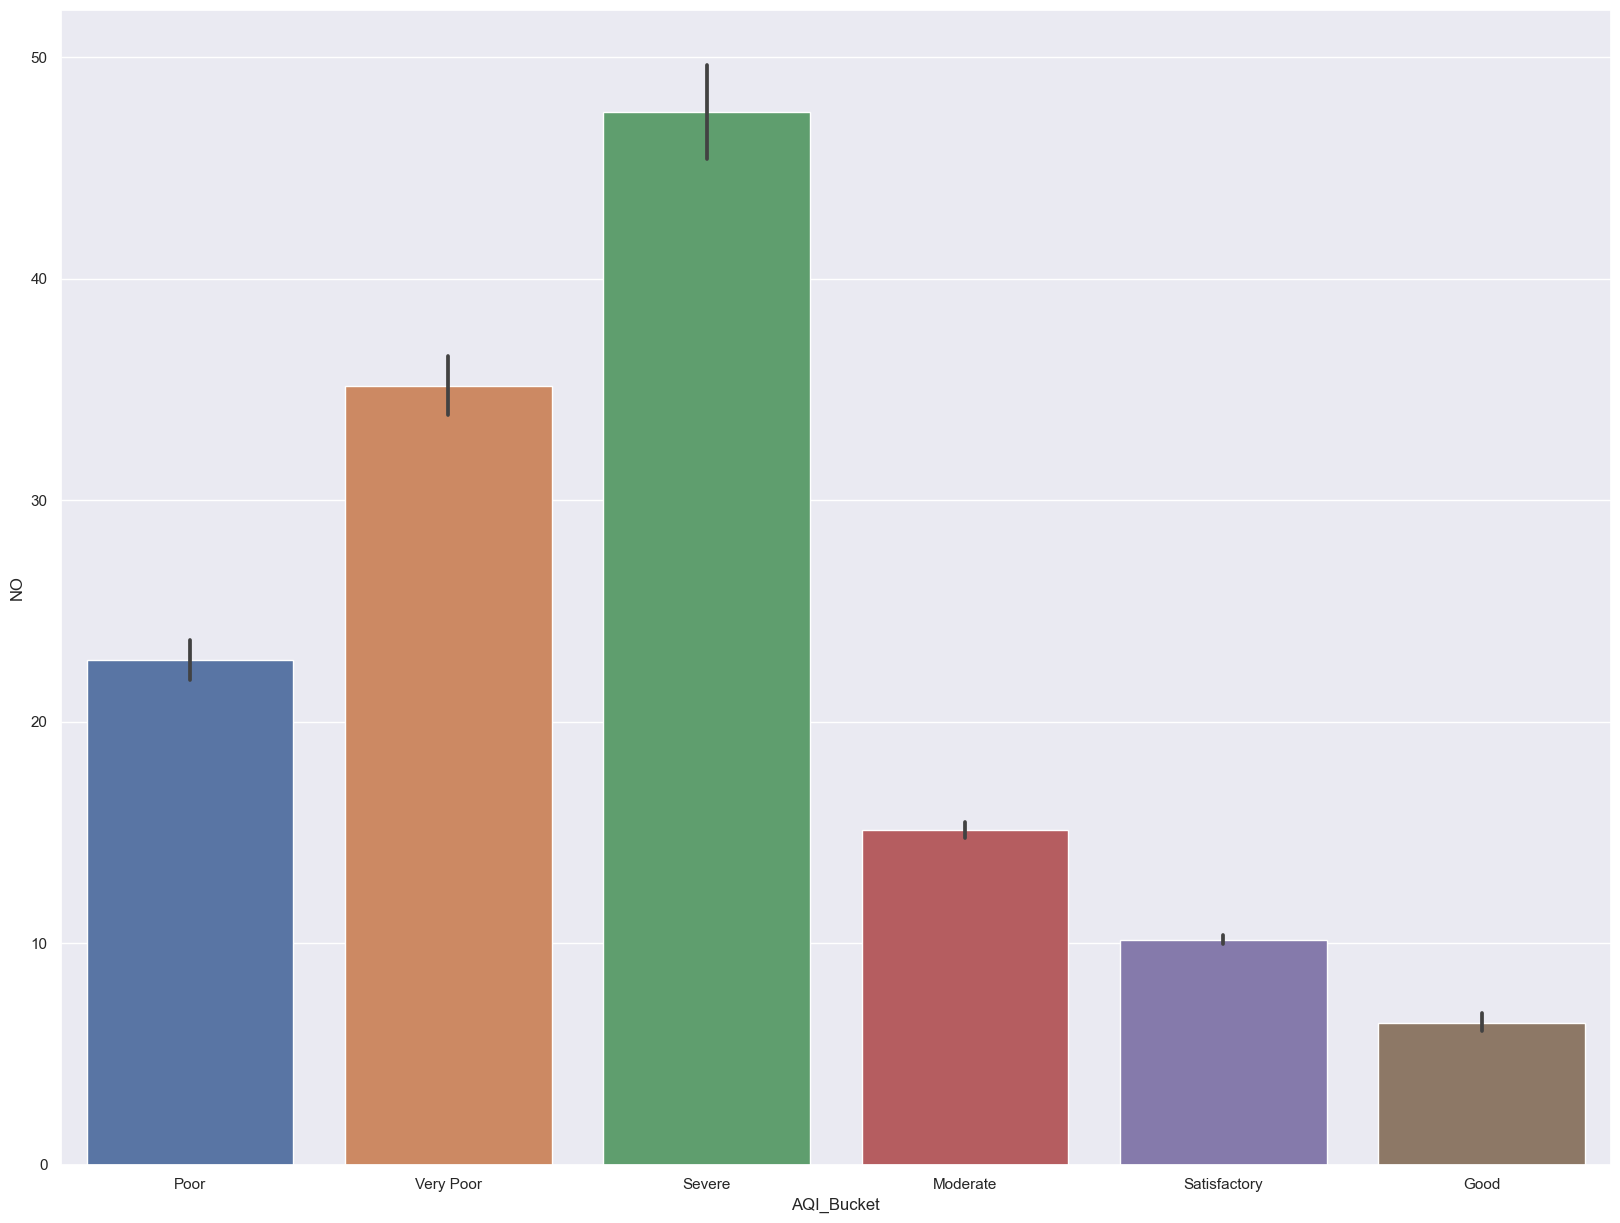

In [156]:
sns.barplot(x=data.AQI_Bucket,y=data["NO"])

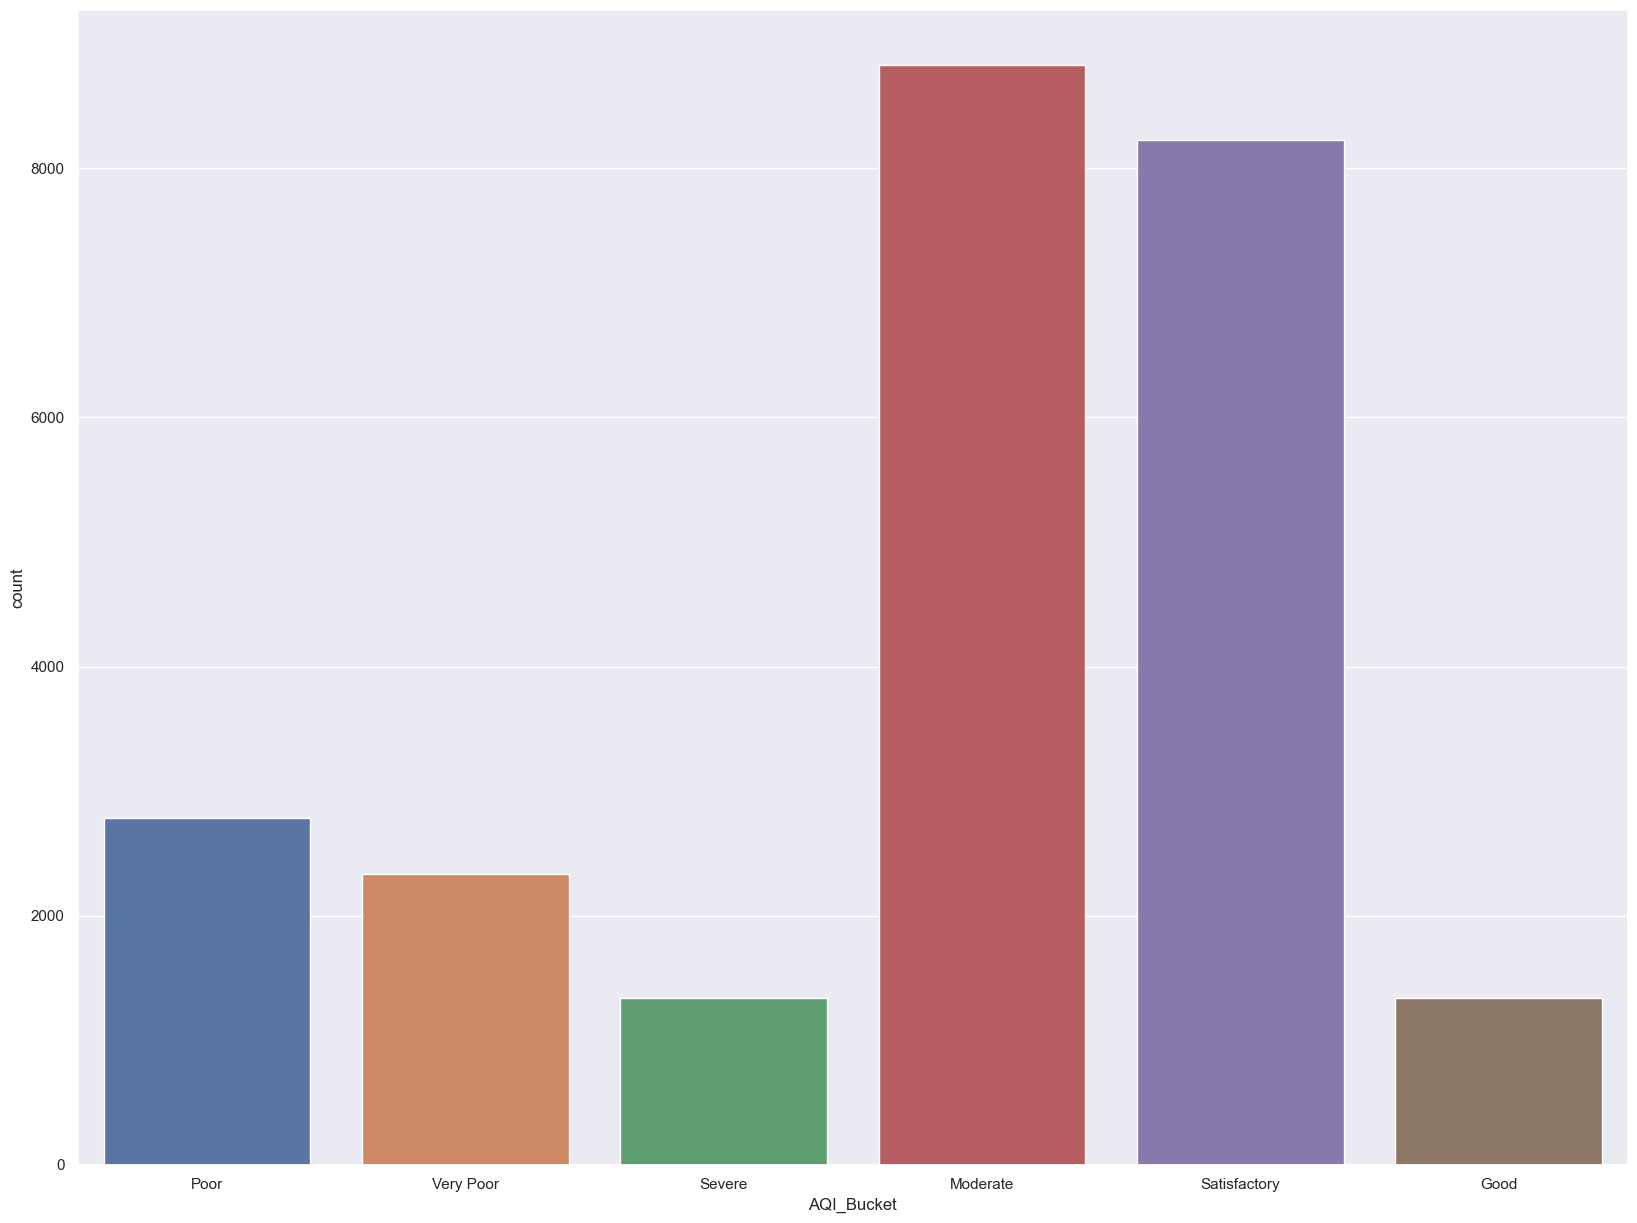

In [157]:
import seaborn as sns
sns.countplot(x =data['AQI_Bucket'], data = data)
plt.savefig("result.png")

In [158]:
data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28,83.13,95.68,6.93,28.71,33.72,15.85,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
29,79.84,95.68,13.85,28.68,41.08,15.85,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
30,94.52,95.68,24.39,32.66,52.61,15.85,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
31,135.99,95.68,43.48,42.08,84.57,15.85,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
32,178.33,95.68,54.56,35.31,72.80,15.85,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


<AxesSubplot:xlabel='AQI_Bucket', ylabel='count'>

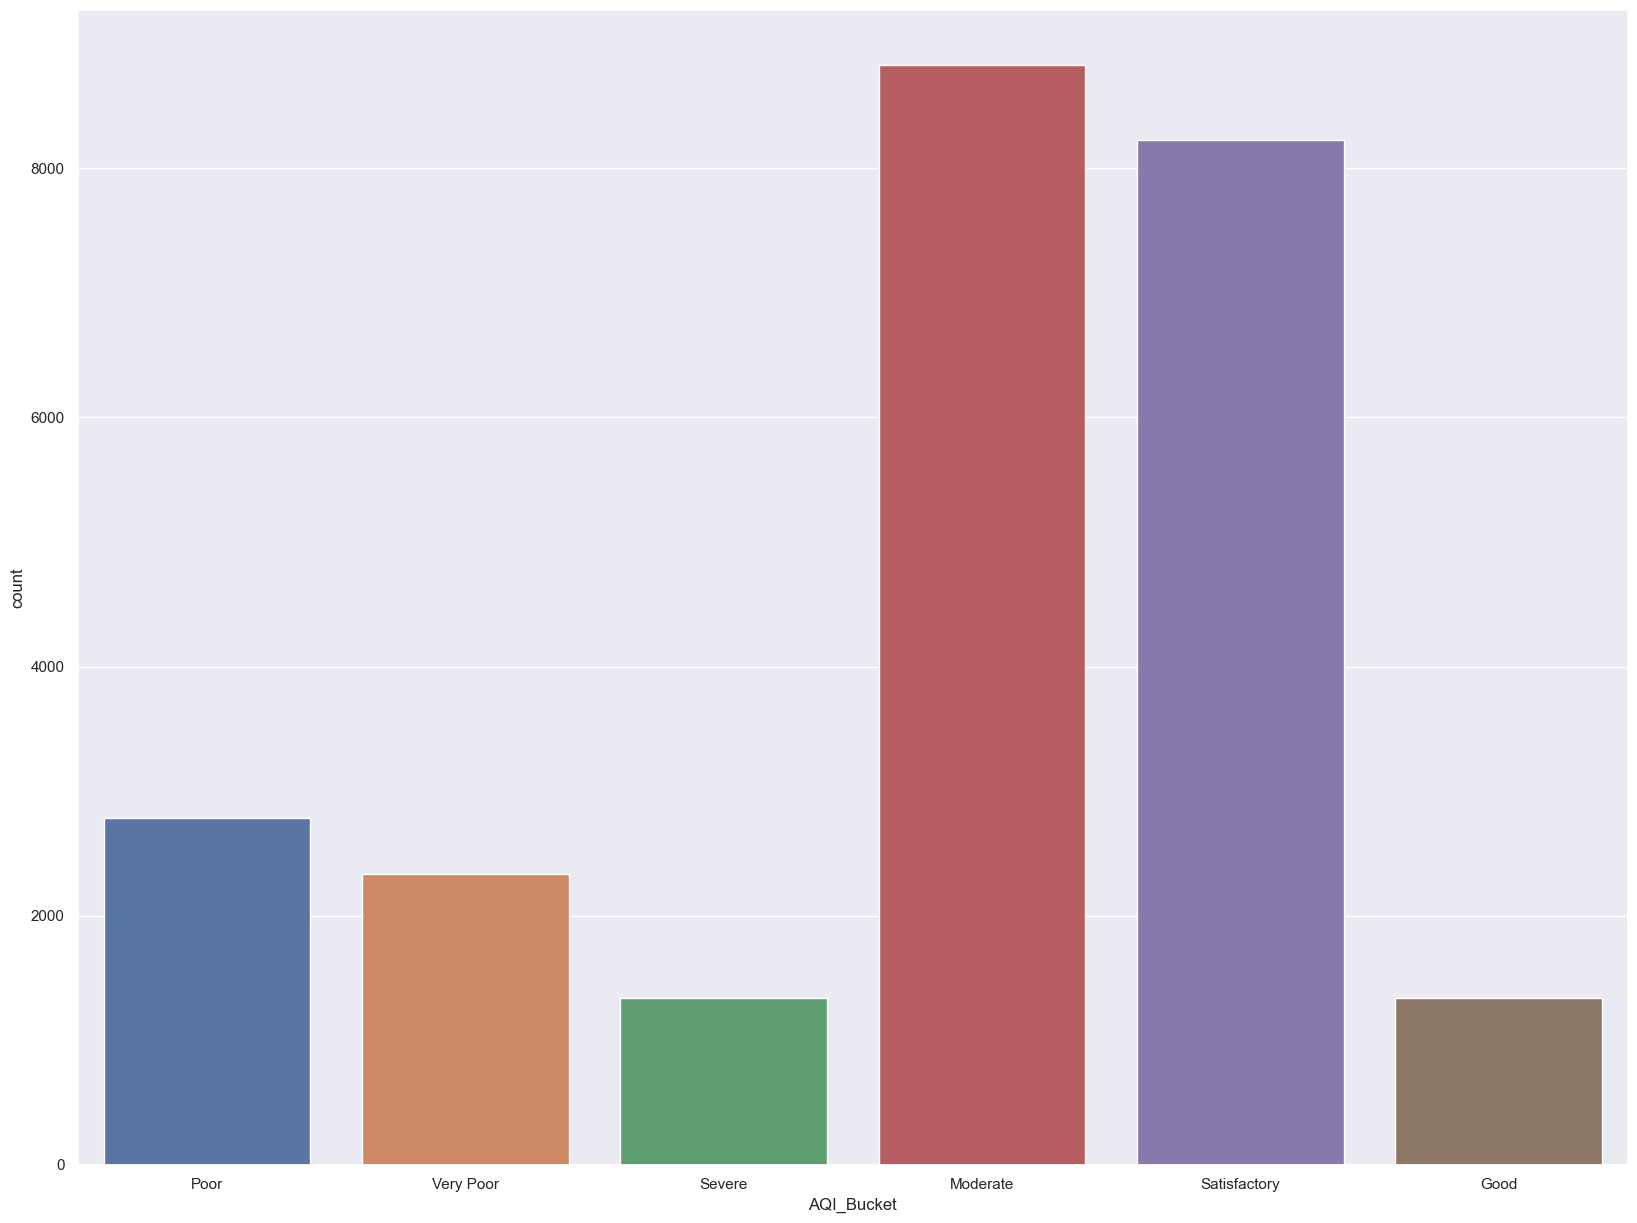

In [159]:
sns.countplot(x =data['AQI_Bucket'], data = data) 

In [160]:
# Preprocessing steps
# Outlier detection using IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [161]:
data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
626,48.57,95.68,9.89,21.69,23.52,15.85,0.89,9.16,30.84,1.07,2.97,0.98,135.0,Moderate
642,48.57,95.68,9.89,21.69,23.52,15.85,0.89,9.16,30.84,1.07,2.97,0.98,236.0,Poor
1809,48.58,93.92,2.56,12.00,7.76,15.85,2.56,20.56,27.73,1.07,2.97,0.98,177.0,Moderate
1971,24.84,70.95,3.98,16.03,10.65,15.85,0.57,9.16,57.53,2.24,12.49,0.98,126.0,Moderate
2010,31.21,38.66,7.20,1.27,10.65,25.63,0.56,4.22,2.81,0.01,0.08,0.98,52.0,Satisfactory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29359,73.83,125.02,2.93,30.68,18.71,11.44,1.03,10.25,83.49,3.87,7.65,0.98,181.0,Moderate
29398,39.52,69.95,2.05,17.39,10.92,11.92,0.92,3.26,17.56,1.63,4.05,0.98,77.0,Satisfactory
29452,18.97,65.80,14.74,29.57,27.71,6.95,0.11,7.14,13.23,2.84,6.59,0.98,68.0,Satisfactory
29462,48.57,95.68,9.89,21.69,23.52,15.85,0.89,9.16,30.84,1.07,2.97,0.98,36.0,Good


In [162]:
# Interpolation
data.interpolate(inplace=True)

In [163]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the data
scaler.fit(data[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']])

# Apply inverse_transform after fitting
data[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']] = scaler.inverse_transform(data[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']])



In [164]:
# Splitting the dataset into train and test sets
X = data.drop(['AQI', 'AQI_Bucket'], axis=1)
y = data['AQI']

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
data = data.drop('AQI_Bucket',axis=1)

In [167]:
data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
626,1382.102819,3705.633352,84.249204,310.676681,361.839964,169.897932,1.360938,55.528078,576.239577,2.116423,9.781784,1.96,135.0
642,1382.102819,3705.633352,84.249204,310.676681,361.839964,169.897932,1.360938,55.528078,576.239577,2.116423,9.781784,1.96,236.0
1809,1382.378328,3638.998515,28.953813,181.065961,133.556391,169.897932,2.241735,114.184109,521.382048,2.116423,9.781784,1.96,177.0
1971,728.318940,2769.338167,39.665881,234.970110,175.418036,169.897932,1.192162,55.528078,1047.026541,3.349330,32.419561,1.96,126.0
2010,903.818447,1546.816067,63.956626,37.544494,175.418036,264.714794,1.186888,30.110465,81.816250,0.999430,2.909602,1.96,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29359,2078.039640,4816.466379,31.744986,430.924397,292.167122,127.143089,1.434777,61.136418,1504.936979,5.066969,20.910439,1.96,181.0
29398,1132.766784,2731.477464,25.106522,253.161088,179.328985,131.796677,1.376760,25.171010,341.992635,2.706532,12.349935,1.96,77.0
29452,566.594904,2574.355547,120.836196,416.077349,422.532106,83.612648,0.949548,45.134641,265.615432,3.981589,18.389846,1.96,68.0
29462,1382.102819,3705.633352,84.249204,310.676681,361.839964,169.897932,1.360938,55.528078,576.239577,2.116423,9.781784,1.96,36.0


In [168]:
X

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
626,1382.102819,3705.633352,84.249204,310.676681,361.839964,169.897932,1.360938,55.528078,576.239577,2.116423,9.781784,1.96
642,1382.102819,3705.633352,84.249204,310.676681,361.839964,169.897932,1.360938,55.528078,576.239577,2.116423,9.781784,1.96
1809,1382.378328,3638.998515,28.953813,181.065961,133.556391,169.897932,2.241735,114.184109,521.382048,2.116423,9.781784,1.96
1971,728.318940,2769.338167,39.665881,234.970110,175.418036,169.897932,1.192162,55.528078,1047.026541,3.349330,32.419561,1.96
2010,903.818447,1546.816067,63.956626,37.544494,175.418036,264.714794,1.186888,30.110465,81.816250,0.999430,2.909602,1.96
...,...,...,...,...,...,...,...,...,...,...,...,...
29359,2078.039640,4816.466379,31.744986,430.924397,292.167122,127.143089,1.434777,61.136418,1504.936979,5.066969,20.910439,1.96
29398,1132.766784,2731.477464,25.106522,253.161088,179.328985,131.796677,1.376760,25.171010,341.992635,2.706532,12.349935,1.96
29452,566.594904,2574.355547,120.836196,416.077349,422.532106,83.612648,0.949548,45.134641,265.615432,3.981589,18.389846,1.96
29462,1382.102819,3705.633352,84.249204,310.676681,361.839964,169.897932,1.360938,55.528078,576.239577,2.116423,9.781784,1.96


In [169]:
y

626      135.0
642      236.0
1809     177.0
1971     126.0
2010      52.0
         ...  
29359    181.0
29398     77.0
29452     68.0
29462     36.0
29530     50.0
Name: AQI, Length: 9536, dtype: float64

In [170]:
data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
626,1382.102819,3705.633352,84.249204,310.676681,361.839964,169.897932,1.360938,55.528078,576.239577,2.116423,9.781784,1.96,135.0
642,1382.102819,3705.633352,84.249204,310.676681,361.839964,169.897932,1.360938,55.528078,576.239577,2.116423,9.781784,1.96,236.0
1809,1382.378328,3638.998515,28.953813,181.065961,133.556391,169.897932,2.241735,114.184109,521.382048,2.116423,9.781784,1.96,177.0
1971,728.318940,2769.338167,39.665881,234.970110,175.418036,169.897932,1.192162,55.528078,1047.026541,3.349330,32.419561,1.96,126.0
2010,903.818447,1546.816067,63.956626,37.544494,175.418036,264.714794,1.186888,30.110465,81.816250,0.999430,2.909602,1.96,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29359,2078.039640,4816.466379,31.744986,430.924397,292.167122,127.143089,1.434777,61.136418,1504.936979,5.066969,20.910439,1.96,181.0
29398,1132.766784,2731.477464,25.106522,253.161088,179.328985,131.796677,1.376760,25.171010,341.992635,2.706532,12.349935,1.96,77.0
29452,566.594904,2574.355547,120.836196,416.077349,422.532106,83.612648,0.949548,45.134641,265.615432,3.981589,18.389846,1.96,68.0
29462,1382.102819,3705.633352,84.249204,310.676681,361.839964,169.897932,1.360938,55.528078,576.239577,2.116423,9.781784,1.96,36.0


# splitting the data into training and testing

In [171]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=100)

# Implementing algorithems

# Decision Tree

In [172]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [173]:
# Support Vector Regressor
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
sv=svr.score(X_test,y_test)
score_sv = round(sv*100,2)
score_sv

74.97

In [174]:
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
gb=gbr.score(X_test,y_test)
score_gb = round(gb*100,2)
score_gb

81.43

In [175]:
import pickle
with open('xg_boost.pkl', 'wb') as file:
   pickle.dump(gbr,file)

In [176]:
from sklearn.metrics import accuracy_score,classification_report
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
l=lin_reg.score(X_test,y_test)
score_l = round(l*100,2)
score_l

75.78

In [177]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
d=dt_reg.score(X_test, y_test)
score_d = round(d*100,2)
score_d

62.76

In [178]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,y_train)
y_pred_rfr=regressor.predict(X_test)
r=regressor.score(X_test, y_test)
score_r = round(r*100,2)
score_r

80.3

In [179]:
scores = [abs(score_d),abs(score_r),abs(score_l),abs(score_sv),abs(score_gb)]
algorithms = ["decision tree","random forest","logistic regression","SVM REG","XGBOOST"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using decision tree is: 62.76 %
The accuracy score achieved using random forest is: 80.3 %
The accuracy score achieved using logistic regression is: 75.78 %
The accuracy score achieved using SVM REG is: 74.97 %
The accuracy score achieved using XGBOOST is: 81.43 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

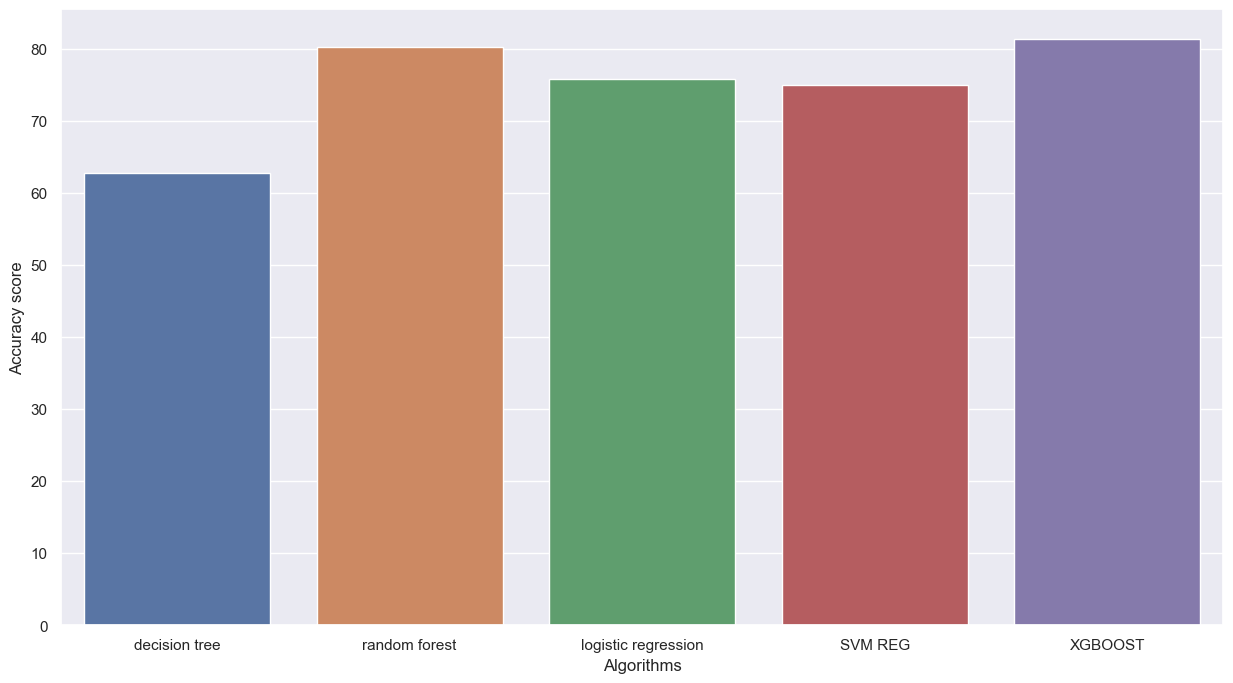

In [180]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)

Support Vector Regressor - Mean Squared Error: 802.7672526210314
Support Vector Regressor - R2 Score: 0.749654103762103
Random Forest Regressor - Mean Squared Error: 631.8134481205251
Random Forest Regressor - R2 Score: 0.8029666713378524
Gradient Boosting Regressor - Mean Squared Error: 595.6222283977614
Gradient Boosting Regressor - R2 Score: 0.8142530352345559


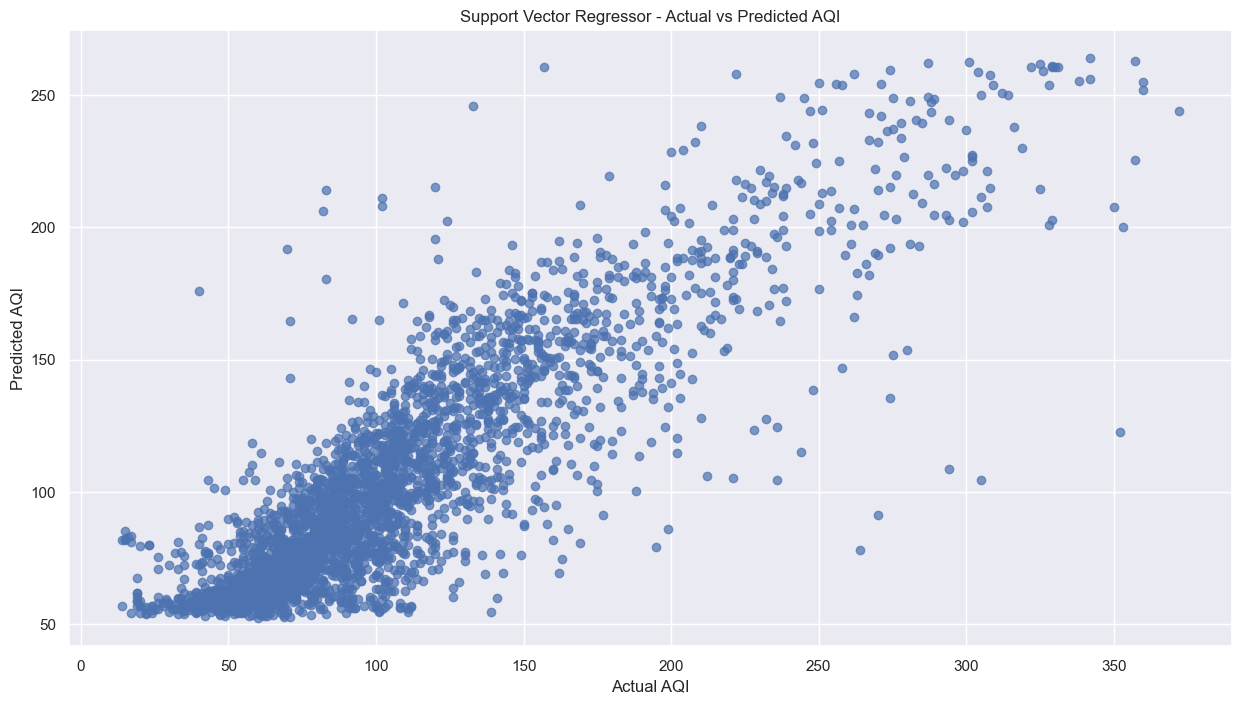

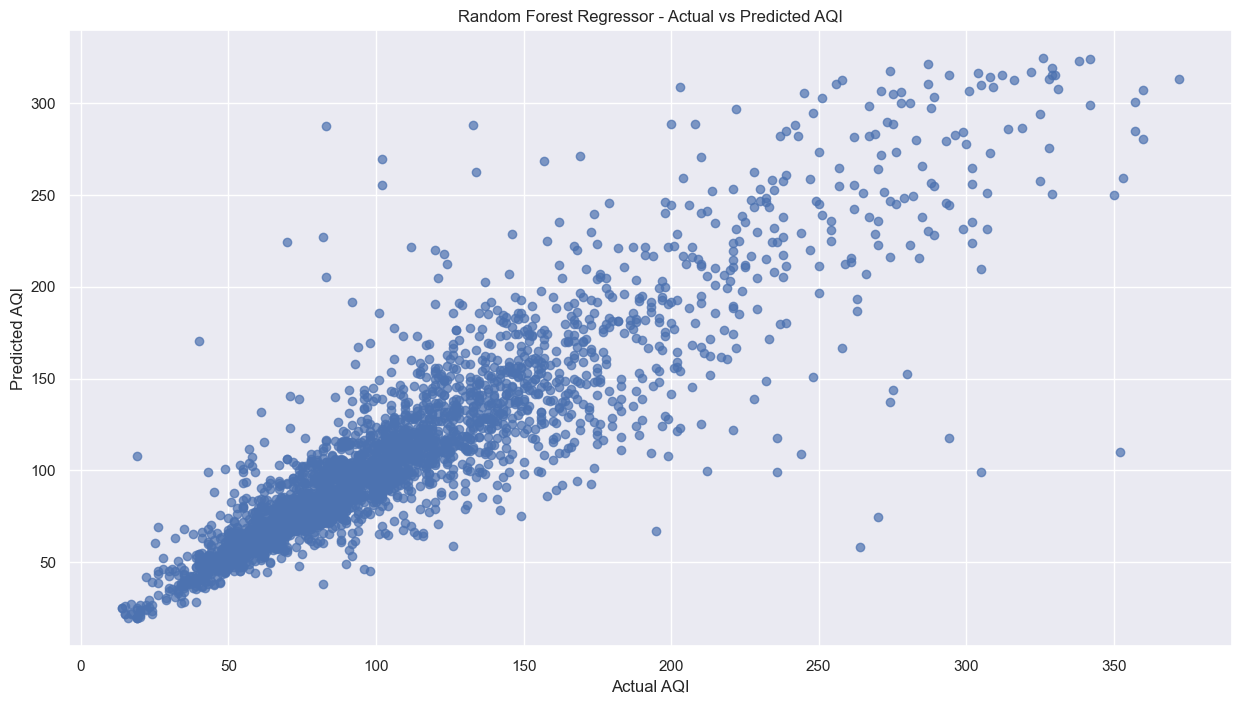

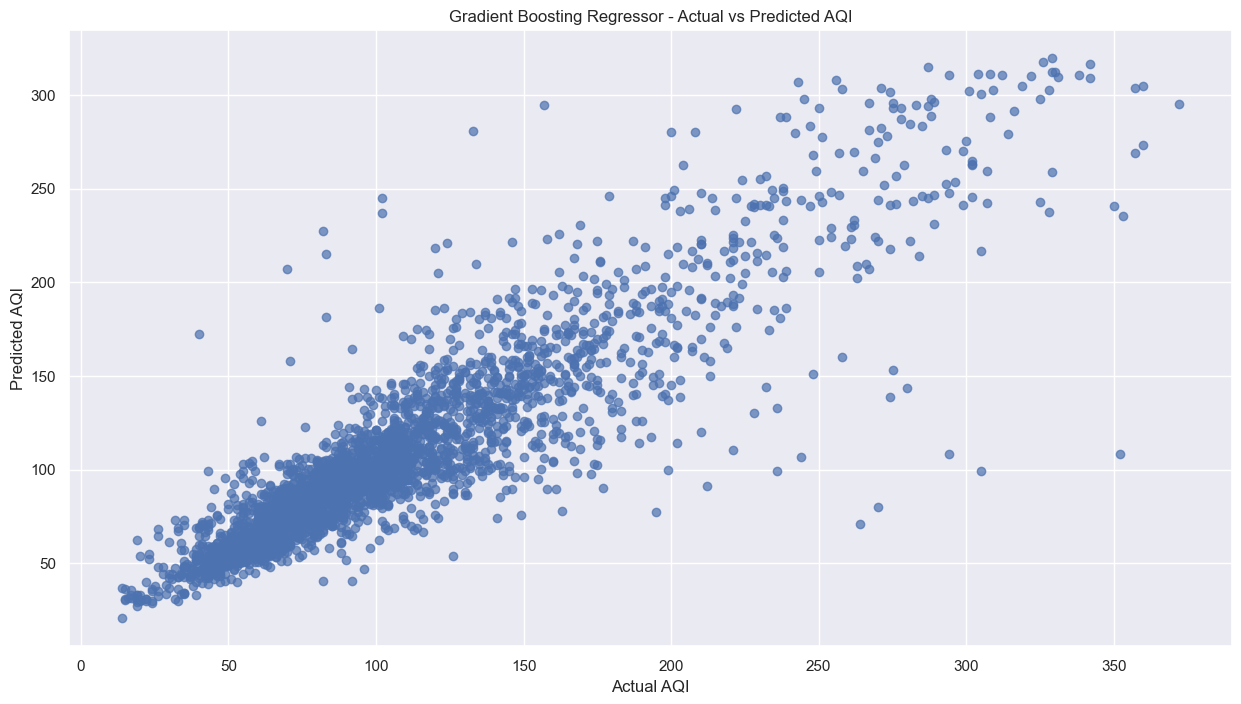

In [181]:
# Evaluation metrics
print('Support Vector Regressor - Mean Squared Error:', mean_squared_error(y_test, y_pred_svr))
print('Support Vector Regressor - R2 Score:', r2_score(y_test, y_pred_svr))

print('Random Forest Regressor - Mean Squared Error:', mean_squared_error(y_test, y_pred_rfr))
print('Random Forest Regressor - R2 Score:', r2_score(y_test, y_pred_rfr))

print('Gradient Boosting Regressor - Mean Squared Error:', mean_squared_error(y_test, y_pred_gbr))
print('Gradient Boosting Regressor - R2 Score:', r2_score(y_test, y_pred_gbr))


# Visualization
import matplotlib.pyplot as plt

# Scatter plot for Support Vector Regressor
plt.scatter(y_test, y_pred_svr, alpha=0.7)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Support Vector Regressor - Actual vs Predicted AQI')
plt.show()

# Scatter plot for Random Forest Regressor
plt.scatter(y_test, y_pred_rfr, alpha=0.7)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Random Forest Regressor - Actual vs Predicted AQI')
plt.show()

# Scatter plot for Gradient Boosting Regressor
plt.scatter(y_test, y_pred_gbr, alpha=0.7)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Gradient Boosting Regressor - Actual vs Predicted AQI')
plt.show()

In [182]:
out = gbr.predict([[.13,0.68,10,0.71,33.72,15.85,6.93,49.52,59.76,0.02,0.00,0.]])

In [183]:
out

array([84.32735515])

In [184]:
if (out > 0 and out < 50):
    print('Good')
elif (out > 51 and out < 100):
    print('Satisfactory ')
elif (out > 101 and out < 200):
    print('Moderate')
elif (out > 201 and out < 300):
    print('Poor')
elif (out > 301 and out < 400):
    print('Very Poor')
elif (out > 401 and out < 500):
    print('Severe')

Satisfactory 


In [185]:
#16/6/2022

from tkinter import *
from tkinter import messagebox
from tkinter.filedialog import askopenfilename
from tkinter import ttk
import numpy as np
import pandas as pd
from PIL import ImageTk, Image
root = Tk()


root.title('air quality index')
root.geometry('850x650')
root.configure(background="purple2")

var = StringVar()
label = Label( root, textvariable = var,font=('arial',20,'bold'),bd=20,background="purple2")
var.set('air quality index')
label.grid(row=0,columnspan=6)

data = ""
data1 = ""

    
def predict():
    from tkinter import ttk
    from PIL import ImageTk, Image
    root10 = Tk()
    root10.title('Predict air quality index')
    root10.geometry('850x650')
    root10.configure(background="Purple3")
#     from PIL import ImageTk, Image
#     img =Image.open('ccc.jpg')   ##   if the image is in another folder u have to access it using path for eg:('C://Users//Romes//Downloads//ccc.jpg')
#     bg = ImageTk.PhotoImage(img)

#     root10.geometry("1280x720")

    # Add image
#     label = Label(root10, image=bg)
#     label.place(x = 0,y = 0)
   

       
       
    label_1 = ttk.Label(root10, text ='city',font=("Helvetica", 16),background="purple3")
    label_1.grid(row=0,column=0)


    options_city = StringVar(root10)
    options_city.set("Select Option") 


    om1 = ttk.OptionMenu(root10, options_city,'Ahmedabad', 'Aizawl', 'Amarawati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam')
    om1.grid(row=0, column=1)
    
    label_2 = ttk.Label(root10, text = 'PM2.5(0.04 - 949)',font=("Helvetica", 16),background="Purple3")
    label_2.grid(row=1,column=0)
    
    Entry_2 = Entry(root10)
    Entry_2.grid(row=1,column=1)
    
    label_3 = ttk.Label(root10, text = 'PM10(0.01 -1000)',font=("Helvetica", 16,),background="Purple3")
    label_3.grid(row=2,column=0)
    
    Entry_3 = Entry(root10)
    Entry_3.grid(row=2,column=1)
    
    label_4 = ttk.Label(root10, text = 'NO(0.02-390)' ,font=("Helvetica", 16),background="Purple3")
    label_4.grid(row=3,column=0)
    
    Entry_4 = Entry(root10)
    Entry_4.grid(row=3,column=1)
    
    label_5 = ttk.Label(root10, text = 'NO2(0.01-362)',font=("Helvetica", 16),background="Purple3")
    label_5.grid(row=4,column=0)
    
    Entry_5 = Entry(root10)
    Entry_5.grid(row=4,column=1)
    
    label_6 = ttk.Label(root10, text = 'NOX(0-467)',font=("Helvetica", 16),background="Purple3")
    label_6.grid(row=5,column=0)
    
    Entry_6 = Entry(root10)
    Entry_6.grid(row=5,column=1)
    
    label_7 = ttk.Label(root10, text = 'NH3(0.01-352)',font=("Helvetica", 16),background="Purple3")
    label_7.grid(row=6,column=0)
    
    Entry_7 = Entry(root10)
    Entry_7.grid(row=6,column=1)
    
    label_8 = ttk.Label(root10, text = 'CO(0-175)',font=("Helvetica", 16),background="Purple3")
    label_8.grid(row=7,column=0)
    
    Entry_8 = Entry(root10)
    Entry_8.grid(row=7,column=1)
    
    label_9 = ttk.Label(root10, text = 'SO2(0.01-193)',font=("Helvetica", 16),background="Purple3")
    label_9.grid(row=8,column=0)
    
    Entry_9 = Entry(root10)
    Entry_9.grid(row=8,column=1)
    
    label_10 = ttk.Label(root10, text = 'O3(0.01-257)',font=("Helvetica", 16),background="Purple3")
    label_10.grid(row=9,column=0)
    
    Entry_10 = Entry(root10)
    Entry_10.grid(row=9,column=1)
    
    label_11 = ttk.Label(root10, text = 'Benzene(0-455)',font=("Helvetica", 16),background="Purple3")
    label_11.grid(row=10,column=0)
    
    Entry_11 = Entry(root10)
    Entry_11.grid(row=10,column=1)
    
    label_12 = ttk.Label(root10, text = 'Toluene(0-454)',font=("Helvetica", 16),background="Purple3")
    label_12.grid(row=11,column=0)
    
    Entry_12 = Entry(root10)
    Entry_12.grid(row=11,column=1)
    
    label_13 = ttk.Label(root10, text ='Xylene(0-170)',font=("Helvetica", 16),background="Purple3")
    label_13.grid(row=12,column=0)
    
    Entry_13 = Entry(root10)
    Entry_13.grid(row=12,column=1)

    
    global labelText,out

    def predout():
        state = options_city.get()
        if state == 'Ahmedabad':
            state = 0
        elif state == 'Aizawl':
            state = 1
        elif state == 'Amarawati':
            state = 2
        elif state == 'Bengaluru':
            state = 3
        elif state == 'Bhopal':
            state = 4
        elif state == 'Brajrajnagar':
            state = 5
        elif state == 'Chandigarh':
            state = 6
        elif state == 'chennai':
            state = 7
        elif state == 'Coimbatore':
            state = 8
        elif state == 'Delhi':
            state = 9
        elif state == 'Ernakulam':
            state = 10
        elif state == 'Gurugam':
            state = 11
        elif state == 'Guwahati':
            state = 12
        elif state == 'Hyderabad':
            state = 13    
        elif state == 'Jaipur':
            state = 14
        elif state == 'Jorapokhar':
            state = 15
        elif state == 'Koch':
            state = 16
        elif state == 'Kolkata':
            state = 17
        elif state == 'Lucknow':
            state = 18
        elif state == 'Mumbai':
            state = 19
        elif state == 'patna':
            state = 20 
        elif state == 'Shillong':
            state = 21
        elif state == 'Talcher':
            state = 22
        elif state == 'MIZORAM':
            state = 23
        elif state == 'Thiruvananthapuram':
            state = 24 
        elif state == 'Visakhapatnam':
            state = 25
        print(state)
        global labelText,logreg,le,X_test,out
        
        data = (float(Entry_2.get()),float(Entry_3.get()),
                float(Entry_4.get()),float(Entry_5.get()),float(Entry_6.get()),
                float(Entry_7.get()),float(Entry_8.get()),float(Entry_9.get()),
                float(Entry_10.get()),float(Entry_11.get()),float(Entry_12.get()),
                float(Entry_13.get()))
        list_1 =[data]
        out = gbr.predict(list_1)
        output.delete(0, END)
        output.insert(0,out[0])
        
        def predout_svc():
            print("hello")
            print(out)
            #global out
            
            from PIL import ImageTk,Image

            if (out >= 0 and out <= 50):
                print('Good')
                output1.delete(0, END)
                output1.insert(0,"Good")
            elif (out >= 51 and out <= 100):
                print('Satisfactory')
                output1.delete(0, END)
                output1.insert(0,"Satisfactory")
            elif (out >= 101 and out <= 200):
                print('Moderate')
                output1.delete(0, END)
                output1.insert(0,"Moderate")
            elif (out >= 201 and out <= 300):
                print('Poor')
                output1.delete(0, END)
                output1.insert(0,"Poor")
            elif (out >= 301 and out <= 400):
                print('Very Poor')
                output1.delete(0, END)
                output1.insert(0,"Very Poor")
            elif (out > 401 ):
                print('Severe')
                output1.delete(0, END)
                output1.insert(0,"Severe")
            
            image = Image.open("result.png")
            image = image.resize((250, 250), Image.ANTIALIAS)
            img = ImageTk.PhotoImage(image)  
            panel1 = Label(root, image=img)
            panel1.image = img
            panel1.grid(row=8,column=3)    
                
                
        label_27 =Button (root10, text = 'predict',font=("Helvetica", 16),background="Purple3",command = predout_svc)
        label_27.grid(row=14,column=0)


        output1 = Entry(root10)
        output1.grid(row=14,column=1)
            
       
        
        labelText.set(data)
    
    label_26 = Button(root10, text = 'AQI',font=("Helvetica", 16),background="Purple3",command = predout)
    label_26.grid(row=13,column=0)  

    output = Entry(root10)
    output.grid(row=13,column=1)
        
        
   
    
   


labelText = StringVar()
labelText.set("")
output = Label(root, textvariable=labelText,width=45, height=6,bg="purple2")
output.grid(row=3,column=4)

B1 = Button(root, text = "Predict",height=1,padx=16,pady=16,bd=8,font=('arial',16,'bold'),width=10,bg="purple2",command = predict)
B1.grid(row=1,column=5)

root.mainloop()

0
hello
[88.62531224]
Satisfactory
0
0
0
0
0
0
0
0
0
0
hello
[128.68891036]
Moderate
